In [1]:
!pip install opencc-python-reimplemented
import time
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import jieba
from opencc import OpenCC  #pip install opencc-python-reimplemented

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.9 MB/s eta 0:00:00


# 新段落

In [2]:
path_to_file = pathlib.Path('/content/cmn.txt')
path_to_file


PosixPath('/content/cmn.txt')

In [3]:

#define a function to load the data, and store into a Chinese dataset, and an English dataset
def load_data(path):
    targ = [] #English dataset
    inp = [] #Chinese dataset
    text = path.read_text(encoding='utf-8') #load the data
    lines = text.splitlines() #
    pairs = [line.split('\t')[:2] for line in lines]
    for y, x in pairs: #read every pairs of dat
        targ.append(y)
        inp.append(x)
    return targ, inp

In [4]:
targ, inp = load_data(path_to_file)
print(len(inp))
print(len(targ))
print(inp[-10:])
print(targ[-10:])

29909
29909
['菲律賓去年地震和海嘯造成了超過6000人的死亡。', '“又是汤姆的电话？” “嗯。最近他每天晚上都会打过来。当时就不该给他我的号码的。”', '我母亲的法语比我父亲的英语要好，所以他们通常用法语交流。', '汤姆不知如何翻译“计算机”一词，因为同他谈话的人从未见过一台。', '汤姆不喜欢使用”有色人种“这个术语，因为他认为，根据这种说法白种人没有颜色。', '你不想涂防晒霜是你的问题，但是晒伤了不要来抱怨。', '即使是现在，我偶尔还是想见到你。不是今天的你，而是我记忆中曾经的你。', '你很容易把母语说得通顺流畅，却很容易把非母语说得不自然。', '虽然我被公司解雇了，但是我还有点存款，所以目前不用担心生计问题。', '如果一個人在成人前沒有機會習得目標語言，他對該語言的認識達到母語者程度的機會是相當小的。']
['Last year in the Philippines, earthquakes and tidal waves resulted in the deaths of more than 6,000 people.', '"Is that Tom calling again?" "Yes. He calls every evening these days. I shouldn\'t have given him my number."', 'My mother speaks French better than my father speaks English, so they usually speak to each other in French.', 'Tom didn\'t know how to translate the word "computer" because the people he was talking to had never seen one.', 'Tom doesn\'t like to use the term "a person of color" because he thinks it implies that white people have no color.', "If you don't want to put on sunscreen, that's your p

In [5]:
#Defines a funciton for converting traditional to simplified
def proce_cn_sentence(cn_text):
    text = cc.convert(cn_text)
    text = jieba.lcut(text)
    text = ' '.join(text)
    return text

In [6]:
cc = OpenCC('t2s')

In [7]:
#word segmentation of sentences.
for i in range(len(inp)):
    text = proce_cn_sentence(inp[i])
    inp[i] = text

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.621 seconds.
DEBUG:jieba:Loading model cost 1.621 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [8]:
inp[-10:] #check the data in inp list


['菲律宾 去年 地震 和 海啸 造成 了 超过 6000 人 的 死亡 。',
 '“ 又 是 汤姆 的 电话 ？ ”   “ 嗯 。 最近 他 每天晚上 都 会 打 过来 。 当时 就 不该 给 他 我 的 号码 的 。 ”',
 '我 母亲 的 法语 比 我 父亲 的 英语 要 好 ， 所以 他们 通常 用 法语 交流 。',
 '汤姆 不知 如何 翻译 “ 计算机 ” 一词 ， 因为 同 他 谈话 的 人 从未见过 一台 。',
 '汤姆 不 喜欢 使用 ” 有色人种 “ 这个 术语 ， 因为 他 认为 ， 根据 这种 说法 白种人 没有 颜色 。',
 '你 不想 涂 防晒霜 是 你 的 问题 ， 但是 晒伤 了 不要 来 抱怨 。',
 '即使 是 现在 ， 我 偶尔 还是 想 见到 你 。 不是 今天 的 你 ， 而是 我 记忆 中 曾经 的 你 。',
 '你 很 容易 把 母语 说 得 通顺 流畅 ， 却 很 容易 把 非 母语 说 得 不 自然 。',
 '虽然 我 被 公司 解雇 了 ， 但是 我 还 有点 存款 ， 所以 目前 不用 担心 生计 问题 。',
 '如果 一个 人 在 成人 前 没有 机会 习得 目标语言 ， 他 对 该 语言 的 认识 达到 母语 者 程度 的 机会 是 相当 小 的 。']

In [9]:
#define the buffze size and bach size
BUFFZE_SIZE = len(inp)
print(BUFFZE_SIZE)
BATCH_SIZE = 64

29909


In [10]:

#load the data from list to dataset
dataset = tf.data.Dataset.from_tensor_slices((inp, targ)).shuffle(BUFFZE_SIZE)
dataset = dataset.batch(BATCH_SIZE)

In [11]:
#check the format of data in the dataset
for example_input_batch, example_target_batch in dataset.take(1):
    print(example_input_batch[:3])
    print()
    print(example_target_batch[:3])
    break

tf.Tensor(
[b'\xe7\x9c\x8b\xe6\x9d\xa5 \xe6\x88\x91 \xe6\x98\x8e\xe5\xa4\xa9 \xe4\xbc\x9a \xe6\x9d\xa5 \xe3\x80\x82'
 b'\xe5\xa5\xb9 \xe6\x98\x8e\xe5\xb9\xb4 \xe5\xb0\x86\xe8\xa6\x81 \xe7\xbb\x93\xe5\xa9\x9a \xe3\x80\x82'
 b'\xe8\xbf\x99\xe6\x9d\xa1 \xe8\xb7\xaf\xe5\xa4\xaa\xe7\xaa\x84 \xe6\xb1\xbd\xe8\xbd\xa6 \xe6\x97\xa0\xe6\xb3\x95 \xe9\x80\x9a\xe8\xa1\x8c \xe3\x80\x82'], shape=(3,), dtype=string)

tf.Tensor(
[b"I'll be here tomorrow, I think."
 b"She'll be getting married next year."
 b'The road is too narrow for cars.'], shape=(3,), dtype=string)


In [12]:
#add the start and end in every Chinese sentence
def tf_lower_and_split_punct_cn(text):
    #change the capital character in to lower
    text = tf.strings.lower(text)
    text = tf.strings.strip(text)
    text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
    return text



In [13]:
example_text = tf.constant('去年 在 菲律宾 ， 地震 和 海啸 造成 了 超过 6000 人 的 死亡 。')
print(example_text.numpy().decode())
print(tf_lower_and_split_punct_cn(example_text).numpy().decode())

去年 在 菲律宾 ， 地震 和 海啸 造成 了 超过 6000 人 的 死亡 。
[START] 去年 在 菲律宾 ， 地震 和 海啸 造成 了 超过 6000 人 的 死亡 。 [END]


In [14]:
max_vocab_size = 15000 #define the size of the Chinese dictionary


In [15]:
#tf.keras.layers.TextVectorization can change sentences into number


input_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct_cn,
    max_tokens=max_vocab_size)

In [16]:
#use the method above
input_text_processor.adapt(inp)

#get the table of vocabulary
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '。', '我', '的', '了', '你', '？']

In [17]:
example_tokens = input_text_processor(example_input_batch)
example_tokens

<tf.Tensor: shape=(64, 17), dtype=int64, numpy=
array([[   2,  390,    5, ...,    0,    0,    0],
       [   2,   15,  868, ...,    0,    0,    0],
       [   2,  424, 7328, ...,    0,    0,    0],
       ...,
       [   2,   10,   30, ...,    0,    0,    0],
       [   2,  858,  237, ...,    0,    0,    0],
       [   2,    5,   18, ...,    0,    0,    0]])>

In [18]:
#the method to process the English sentences
def tf_lower_and_split_punct_en(text):
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
    text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
    text = tf.strings.strip(text)

    text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
    return text

In [19]:
output_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct_en,
    max_tokens=max_vocab_size)

In [20]:
output_text_processor.adapt(targ)
output_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'the', 'i', 'to', 'you', '?']

In [21]:
def tokenize_pairs(cn, en):
    cn = input_text_processor(cn)
    en = output_text_processor(en)
    return cn, en

In [22]:
def make_batches(ds):
    return (
        ds
        .map(tokenize_pairs, num_parallel_calls=tf.data.AUTOTUNE)
    )

In [23]:
train_batches = make_batches(dataset)
train_batches

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [24]:
for (batch, (inp, tar)) in enumerate(train_batches.take(3)):
    print(batch)
    print(inp)
    print(tar)

0
tf.Tensor(
[[    2  4709     7     4     3     0     0     0     0     0     0     0
      0]
 [    2    12   262    32   113     4     3     0     0     0     0     0
      0]
 [    2   591  1035  1364   935   963     4     3     0     0     0     0
      0]
 [    2    17    13   469  1335   358  7506     6     4     3     0     0
      0]
 [    2     5  8587  1652     4     3     0     0     0     0     0     0
      0]
 [    2    15    34     5  3181     7   488     4     3     0     0     0
      0]
 [    2    10    13     5     6    31   854     4     3     0     0     0
      0]
 [    2    10    20  6806     6   363 10706     4     3     0     0     0
      0]
 [    2    17  3244     7    31   109     4     3     0     0     0     0
      0]
 [    2    62    27   144   577     4     3     0     0     0     0     0
      0]
 [    2     8    55   253    10  1459     4     3     0     0     0     0
      0]
 [    2     8    26    15    78   154   367    14     9     3     0     0


In [25]:
# PE represent the information of the position
# pos represent the position of every word in the sentenece
# embedding size is 300
# i=0 时 2i=0 represent the first embedding position is even
# when 2i is even we use sin, 2i+1 is odd we use cos


# the calculation formula
def get_angles(pos, i, d_model):
    angle_rates = 1/np.power(10000, (2 * (i//2)) / np.float32(d_model)) #i//2取整
    return pos * angle_rates


#position represent the length of the sentence, d_model represent the dimension of embedding
def positional_encoding(position, d_model):

    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...] #(1, position, d_model)

    return tf.cast(pos_encoding, dtype=tf.float32) #change the data into float

In [26]:
def create_padding_mask(seq):
    #seq is the sentenece after padding and digitalizing

    #tf.math.equal(x,y)
    #tf.cast()change the type of data
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32) #(batch_size, seq_len)

    #add new dimension into padding
    #将add attention into logits
    return seq[:, tf.newaxis, tf.newaxis, :] #(batch_size, 1, 1, seq_len)

In [27]:
def create_look_ahead_mask(size):
    #size is the length of the sentence

    mask = 1 - tf.linalg.band_part(tf.ones((size,size)), -1, 0)
    return mask #(seq_len, seq_len)

In [28]:
tf.ones((5,5))


<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [29]:
tf.linalg.band_part(tf.ones((5, 5)), -1, 0)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [30]:
#when num_lower, num_upper are all 0, only store the value on the diagonal
tf.linalg.band_part(tf.ones((5, 5)), 0, 0)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [31]:
#when num_lower is 1, only store the value under the diagonal
tf.linalg.band_part(tf.ones((5, 5)), 1, 0)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1.]], dtype=float32)>

In [32]:
#when num_upper is 1, only store the value above the diagonal
tf.linalg.band_part(tf.ones((5, 5)), 0, 1)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [33]:
# Sequence mask apply in the decoder

x = tf.random.uniform((3, 5)) # we assume there are 3 sentence, and length is 5
temp1 = create_look_ahead_mask(x.shape[1])
temp1

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [34]:
#temp2 we create a padding_mask
x = tf.constant([[1, 3, 2, 3, 0], [5, 2, 3, 0, 0], [7, 8, 0, 0, 0 ]])
temp2 = create_padding_mask(x)
temp2

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 1.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[0., 0., 1., 1., 1.]]]], dtype=float32)>

In [35]:
#combine the temp1 and temp2, and return the maximum of them
sequence_mask = tf.maximum(temp2, temp1)
sequence_mask

<tf.Tensor: shape=(3, 1, 5, 5), dtype=float32, numpy=
array([[[[0., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1.]]],


       [[[0., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1.],
         [0., 0., 0., 1., 1.],
         [0., 0., 0., 1., 1.]]],


       [[[0., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1.],
         [0., 0., 1., 1., 1.],
         [0., 0., 1., 1., 1.],
         [0., 0., 1., 1., 1.]]]], dtype=float32)>

In [36]:
def scaled_dot_product_attention(q, k, v, mask):
    """计算注意力权重。
    q, k, v 必须具有匹配的前置维度。
    k, v 必须有匹配的倒数第二个维度，例如：seq_len_k = seq_len_v。
    虽然 mask 根据其类型（填充或前瞻）有不同的形状，
    但是 mask 必须能进行广播转换以便求和。

    参数:
    q: 请求的形状 == (..., seq_len_q, depth)
    k: 主键的形状 == (..., seq_len_k, depth)
    v: 数值的形状 == (..., seq_len_v, depth_v)
    mask: Float 张量，其形状能转换成
          (..., seq_len_q, seq_len_k)。默认为None。

    返回值:
    输出，注意力权重
    """

    # define and calculate the attention weight
    matmul_qk = tf.matmul(q, k, transpose_b=True) # （batch_size, num_heads, seq_len_q, seq_len_k)

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1) # （batch_size, num_heads, seq_len_q, seq_len_k)

    #tf.matmul attention_weights times v
    output = tf.matmul(attention_weights, v) # （batch_size, num_heads, seq_len_q, depth_v)

    return output, attention_weights

In [37]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads): #we assume d_model=512, num_heads=8
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        #assertion function
        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads # depth=64

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size): #we assume batch_size=32, x is q,k,v shape are all(batch_size, seq_len, d_model)
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        '''分拆最后一个维度到(num_heads, depth)
        转置结果使得形状为(batch_size, num_heads, seq_len, depth)
        '''
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights




In [38]:
#d_model must be divided evenly by num_heads
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((32, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn= temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([32, 60, 512]), TensorShape([32, 8, 60, 60]))

In [39]:
# realize the above, and get the result Z
# assume we have 2 heads
x = tf.random.normal([2,4])

wq0 = tf.random.normal([4,3])
wk0 = tf.random.normal([4,3])
wv0 = tf.random.normal([4,3])
print(wq0)
print(wk0)
print(wv0)

wq1 = tf.random.normal([4,3])
wk1 = tf.random.normal([4,3])
wv1 = tf.random.normal([4,3])
print(wq1)
print(wk1)
print(wv1)

q0 = tf.matmul(x, wq0)
k0 = tf.matmul(x, wk0)
v0 = tf.matmul(x, wv0)
print(q0)
print(k0)
print(v0)

q1 = tf.matmul(x, wq1)
k1 = tf.matmul(x, wk1)
v1 = tf.matmul(x, wv1)
print(q1)
print(k1)
print(v1)

#上面求出了q0,q1,k0,k1,v0,v1.我们进行self-attention计算
score0 = tf.matmul(q0, k0, transpose_b=True)
score1 = tf.matmul(q1, k1, transpose_b=True)
divide0 = score0/tf.sqrt(2.)
divide1 = score1/tf.sqrt(2.)
softmax0 = tf.nn.softmax(divide0)
softmax1 = tf.nn.softmax(divide1)
z0 = tf.matmul(softmax0, v0)
z1 = tf.matmul(softmax1, v1)
concat_z0_z1 = tf.concat([z0, z1], axis=1)
wo = tf.random.normal([6, 4])
Z = tf.matmul(concat_z0_z1, wo)


tf.Tensor(
[[ 0.46622962  0.2080252  -0.84371126]
 [ 0.80454445 -0.4703905  -0.61515003]
 [-0.41130337 -0.92221004  0.8592183 ]
 [ 0.34704027 -1.7107095  -0.03712396]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[ 0.9348219  -1.4569345  -1.4892461 ]
 [ 1.1499858  -0.2787443   0.0275764 ]
 [ 1.0697577  -0.50963944  1.132039  ]
 [ 1.9215623   0.31058407  0.33645138]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[-0.26877266 -0.49885225 -1.4473995 ]
 [ 0.19996443  0.70790386 -0.6599549 ]
 [ 0.5505534   0.5891746  -1.5186629 ]
 [-1.1657658  -0.5380835  -0.14188465]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[ 0.2693474  -1.104103    1.6133176 ]
 [ 1.5124226   1.4598664  -0.22685947]
 [-0.62625355 -1.4525222  -0.86046547]
 [ 0.09839997 -0.6266672   0.9287517 ]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[ 2.2354498   0.83556646  0.644459  ]
 [-1.2137841   0.08957743 -1.5414487 ]
 [ 0.5464072  -0.5082599   1.8049049 ]
 [-0.53800225  0.57333916 -0.5404756 ]], shape=(4, 3), dtype=float32)
tf.Tensor(

In [40]:
def point_wise_feed_forward_network(d_model, dff):
    #d_model, the depth of the embedding
    #dff the neural number we want to add
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'), #(batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model) #(batch_size, seq_len, d_model)
    ])

In [41]:
class EncoderLayer(tf.keras.layers.Layer):
    # d_model we set 512 here
    # num_heads we set 8
    # dff we set 2048
    # rate we add dropout in this part to prevent the overfittion
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads) #multihead self attention
        self.ffn = point_wise_feed_forward_network(d_model, dff) #feed forward network

        #层标准化
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        #dropout层
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        #get multi head attention
        attn_output, _ = self.mha(x, x, x, mask) #(batch_size, input_seq_len, d_model)
        #增加dropout层
        attn_output = self.dropout1(attn_output, training=training)
        #add x into residual calculation
        out1 = self.layernorm1(x + attn_output) #(batch_size, input_seq_len, d_model)

        #feed forward network
        ffn_output = self.ffn(out1) #(batch_size, input_seq_len, d_model)
        #dropout
        ffn_output = self.dropout2(ffn_output, training=training)
        #add x into the residual calculation, and layer normalizaitio
        out2 = self.layernorm2(out1 + ffn_output) #(batch_size, input_seq_len, d_model)

        return out2


In [42]:
# 测试encoderlayer类
# initialize the encoder
sample_encoder_layer = EncoderLayer(512, 8, 2048)

#call the call method
sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

In [43]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        # multi-head attention
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        #combine the encoder and decoder
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        #feed forward network
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        #layer normalizaition
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)

        #decoder attention, residual, and layernorm
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask) #(batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        #(batch_size, target_seq_len, d_model)
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2


In [44]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output,
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

In [45]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                 maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()
        #num_layers, represent the number of encoderlayer
        #d_model, represent the depth of embedding的
        #num_heads
        #dff
        #input_vocab_size
        #maximum_position_encoding
        self.d_model = d_model
        self.num_layers = num_layers

        #embedding
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        #position embadding
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        #initialize num_layers of EncoderLayer
        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1] #get the longest sentence

        #add the information to every word
        x = self.embedding(x) #(batch_size, input_seq_len, d_model)
        #x times d_moder.sqrt is to enhance semantic information and weaken positional information
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))

        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        #loop EncoderLayer for num_layers times
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x #(batch_size, input_seq_len, d_model)


In [46]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


In [47]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
                 maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        #embedding
        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        #position embadding
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        # initialize num_layers DecoderLayers
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1] #seq_len is target_seq_len
        attention_weights = {}

        #same as encoder
        x = self.embedding(x) #(batch_size, target_seq_len, d_model)

        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))

        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights[f'decoder_layer{i+1}_block1'] = block1
            attention_weights[f'decoder_layer{i+1}_block2'] = block2

        #x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [48]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input,
                              enc_output=sample_encoder_output,
                              training=False,
                              look_ahead_mask=None,
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

In [49]:
class Transformer(tf.keras.Model):
    #define transformer with num_layers, d_model, num_heads, dff,input_vocab_size,target_vocab_size,pe_input,pe_target

    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                 target_vocab_size, pe_input, pe_target, rate=0.1):

        super().__init__()

        #transformer encoder
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)
        #transformer decoder
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inputs, training):
        # Keras models prefer if you pass all your inputs in the first argument
        inp, tar = inputs

        #create masks
        enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

        enc_output = self.encoder(inp, training, enc_padding_mask) #(batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output) #(batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights

    def create_masks(self, inp, tar):
        #Encoder padding mask
        enc_padding_mask = create_padding_mask(inp) #（batch_size, 1, 1, inp_seq_len)

        #Used in the 2nd attention block in the decoder.
        #This padding mask is used to mask the encoder outputs.
        dec_padding_mask = create_padding_mask(inp) #（batch_size, 1, 1, inp_seq_len)

        # Used in the 1st attention block in the decoder.
        # It is used to pad and mask future tokens in the input received by
        # the decoder.
        look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1]) #(tar_seq_len, tar_seq_len)
        dec_target_padding_mask = create_padding_mask(tar) #(batch_size, 1, 1, tar_seq_len)
        #tf.maximum(x,y) return the maximum of  x and y
        look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask) #（batch_size, 1, tar_seq_len, tar_seq_len)

        return enc_padding_mask, look_ahead_mask, dec_padding_mask


In [50]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048,
    input_vocab_size=8500, target_vocab_size=8000,
    pe_input=10000, pe_target=6000)

temp_input = tf.random.uniform((1, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((1, 4), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer([temp_input, temp_target], training=False)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([1, 4, 8000])

In [51]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

In [52]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # step is float32
        #step is step_num, arg1 is the value continuously decrease
        arg1 = tf.math.rsqrt(step)
        #arg2 is the value continusously increase
        arg2 = step * (self.warmup_steps ** -1.5)

        #arg1 > arg2 at the beginning, when warmup_steps(4000), arg1 == arg2, when 4001, arg1 < arg2
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

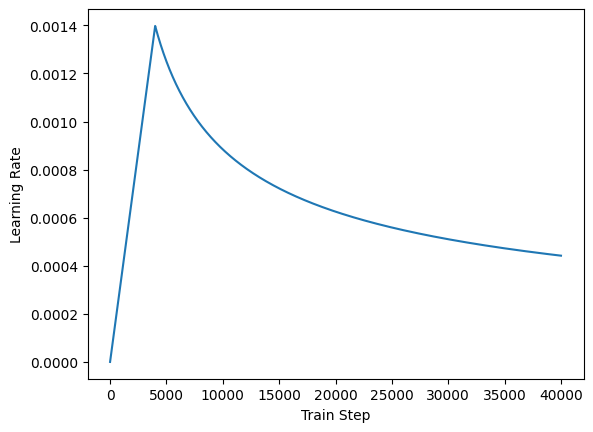

In [53]:
temp_learning_rate_scheldule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_scheldule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [54]:
learning_rate = CustomSchedule(d_model)
#optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)


In [55]:
#Sparse cross-entropy loss function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [56]:
def loss_function(real, pred):
    #real 真实值 shape （batch_size, target_seq_len)
    #这里的target_seq_len 要去掉句子开头的start, 所以实际长度要减一
    #pred 预测值 shape （batch_size, tar_seq_len, target_vocab_size)
    #预测值里的tar_seq_len是没有start的，因为start是作为预测的输入，
    #而输出是start后面的第一个单词

    #tf.math.equal(real,0) 0 is true，not 0 is false
    #tf.math.logical_not(tf.math.equal(real, 0)) change true into false， false into true
    mask = tf.math.logical_not(tf.math.equal(real, 0))

    #get the loss
    loss_ = loss_object(real, pred)

    #change the data type
    mask = tf.cast(mask, dtype=loss_.dtype)

    #delete mask values,
    loss_ *= mask

    #the average of loss
    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [57]:
def accuracy_function(real, pred):
    #real (batch_size, target_seq_len) target_seq_len == loss real
    #pred (batch_size, tar_seq_len, target_vocab_size)
    #tar_seq_len == target_seq_len

    #tf.argmax 取pred里的最大值，axis=2 表示取第3个维度target_vocab_size里的最大值
    #最后shape为（batch_size, tar_seq_len)
    #tf.equal 就是拿real和刚取了最大值的pred进行比较
    #值相等的单词就是true 否则为false
    accuracies = tf.equal(real, tf.argmax(pred, axis=2))

    mask = tf.math.logical_not(tf.math.equal(real,0))

    #if mask == accuracies: true else: false
    accuracies = tf.math.logical_and(mask, accuracies)

    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)

    #tf.reduce_sum(accuracies) how many word that is predicted correct
    #tf.reduce_sum(mask) how many word in total
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

# loss and  accuracy
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [58]:
input_text_processor.vocabulary_size()  #input size
output_text_processor.vocabulary_size() #output size


7180

In [59]:
# initialize Transformer
#num_layers, 表示decodrlayer部件要有几个
#d_model, 表示embedding的深度是多少
#num_heads 表示多头注意力里面的多头数是多少
#dff 表示增加非线性时设置的神经元个数
#input_vocab_size 输入的词典大小
#target_vocab_size 输出的词典大小
#这里的pe_input 就是前面的maximum_position_encoding 最大句子的长度 这里是输入句子的最大长度
#这里的pe_target 就是前面的maximum_position_encoding 最大句子的长度 这里是输出句子的最大长度

transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=input_text_processor.vocabulary_size(),
    target_vocab_size=output_text_processor.vocabulary_size(),
    pe_input=1000,
    pe_target=1000,
    rate=dropout_rate)

In [60]:
checkpoint_path = "./checkpoints/cn_en/train" #检测文件保存位置

#the content stored in check point
ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)
#max_to_keep=5
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

#recover the newest check point
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

In [61]:
EPOCHS = 20


In [62]:
#define train_step_signature
#列表里含有2个被tf.TensorSpec定义的张量
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]
train_step_signature

[TensorSpec(shape=(None, None), dtype=tf.int64, name=None),
 TensorSpec(shape=(None, None), dtype=tf.int64, name=None)]

In [63]:
#input_signature的好处：
#1.可以限定函数的输入类型，以防止调用函数时调错，
#2．一个函数有了input_signature之后，在tensorflow里边才可以保存成savedmodel。
#在保存成savedmodel的过程中，需要使用get_concrete_function函数把一个tf.function
#标注的普通的python函数变成带有图定义的函数。

# tf.function 模块
#我们仅需加入一个简单的 @tf.function 修饰符，就能轻松将模型以图模式运行！

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    #tf.GradientTape() used to calculate the gradient
    with tf.GradientTape() as tape:
        #get predicted values
        predictions, _ = transformer([inp, tar_inp], training=True)
        #get loss
        loss = loss_function(tar_real, predictions)
    #calculate the gradient
    gradients = tape.gradient(loss, transformer.trainable_variables)
    #apply gradient
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    #calculate the loss and accuracy
    train_loss(loss)
    train_accuracy(accuracy_function(tar_real, predictions))

In [64]:
for epoch in range(EPOCHS): #train the data for 20 epochs
    start = time.time()

    #initialize the loss and accuracy
    train_loss.reset_states()
    train_accuracy.reset_states()

    # inp -> China, tar -> english
    for (batch, (inp, tar)) in enumerate(train_batches):
        train_step(inp, tar)
        #every 50 batch print one loss和accuray
        if batch % 50 == 0:
            print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
    #every 5个epoch store a check point
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')
    #after every epoch, print the loss and accuracy
    print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
    #print the training time of every epoch
    print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

Epoch 1 Batch 0 Loss 8.9026 Accuracy 0.0000
Epoch 1 Batch 50 Loss 8.8054 Accuracy 0.0218
Epoch 1 Batch 100 Loss 8.6600 Accuracy 0.0709
Epoch 1 Batch 150 Loss 8.5137 Accuracy 0.0882
Epoch 1 Batch 200 Loss 8.3441 Accuracy 0.0968
Epoch 1 Batch 250 Loss 8.1402 Accuracy 0.1078
Epoch 1 Batch 300 Loss 7.9108 Accuracy 0.1266
Epoch 1 Batch 350 Loss 7.6733 Accuracy 0.1411
Epoch 1 Batch 400 Loss 7.4394 Accuracy 0.1517
Epoch 1 Batch 450 Loss 7.2218 Accuracy 0.1608
Epoch 1 Loss 7.1513 Accuracy 0.1644
Time taken for 1 epoch: 75.40 secs

Epoch 2 Batch 0 Loss 5.2011 Accuracy 0.2777
Epoch 2 Batch 50 Loss 5.1676 Accuracy 0.2739
Epoch 2 Batch 100 Loss 5.0694 Accuracy 0.2788
Epoch 2 Batch 150 Loss 4.9826 Accuracy 0.2850
Epoch 2 Batch 200 Loss 4.9059 Accuracy 0.2916
Epoch 2 Batch 250 Loss 4.8340 Accuracy 0.2991
Epoch 2 Batch 300 Loss 4.7632 Accuracy 0.3060
Epoch 2 Batch 350 Loss 4.7027 Accuracy 0.3110
Epoch 2 Batch 400 Loss 4.6450 Accuracy 0.3162
Epoch 2 Batch 450 Loss 4.5941 Accuracy 0.3209
Epoch 2 Loss 4

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
class Translator(tf.Module):
    def __init__(self, input_text_processor, output_text_processor, transformer):
        self.tokenizers_pt = input_text_processor
        self.tokenizers_en = output_text_processor

        self.output_token_string_from_index = (
        tf.keras.layers.StringLookup(
            vocabulary=output_text_processor.get_vocabulary(),
            mask_token='',
            invert=True))
        self.transformer = transformer

    def __call__(self, sentence, max_length=20):

        assert isinstance(sentence, tf.Tensor)

        if len(sentence.shape) == 0:
            sentence = sentence[tf.newaxis]

        sentence = self.tokenizers_pt(sentence)

        encoder_input = sentence

        start_and_end = self.tokenizers_en([''])[0]

        start = start_and_end[0][tf.newaxis]

        end = start_and_end[1][tf.newaxis]




        #if dynamic_size set to True, then the array we grow automatically
        output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
        #write(index, value) ：write the value into  index;
        output_array = output_array.write(0, start)


        for i in tf.range(max_length):
            #output_array.stack()return all the values in output_array
            #tf.transpose is the shape of tensor
            #shape is （2，1）tf.transpose change into（1，2）
            output = tf.transpose(output_array.stack())

            #output value will create a predict value (batch_size, tar_seq_len, target_vocab_size)
            #we input a sentence，batch_size = 1
            #tar_seq_len will change with the change of output second dimentsion, 1,2,3
            #target_vocab_size will not change
            #（1, 1, 8000), (1, 2, 8000), (1, 3, 8000)
            predictions, _ = self.transformer([encoder_input, output], training=False)

            #change the last token from seq_len dimension
            predictions = predictions[:, -1:, :]

            #get the argmax
            predicted_id = tf.argmax(predictions, axis=-1)

            #append it into output_array
            output_array = output_array.write(i+1, predicted_id[0])

            #if id equals to end, means the prediction is over, break the loop
            if predicted_id == end:
                break

        #tf.transpose change output_array into （1，tokens）
        output = tf.transpose(output_array.stack())


        #extract all the predicted words
        #result_text_tokens = output_vocab[output[0].numpy()]
        result_text_tokens = self.output_token_string_from_index(output)

        #delete the start and end
        #text_tokens = result_text_tokens[1:-1]
        text_tokens = result_text_tokens[:, 1:-1]

        #join the words into sentence
        #text = ' '.join(text_tokens)
        text = tf.strings.reduce_join(text_tokens, axis=1, separator=' ')


        _, attention_weights = self.transformer([encoder_input, output[:,:-1]], training=False)

        return text[0], result_text_tokens, attention_weights

In [74]:
#打印结果
def print_translation(sentence, tokens, ground_truth):
    print(f'{"Input:":15s}: {sentence}') #input sentence
    print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}') #predict value
    print(f'{"Ground truth":15s}: {ground_truth}') #ground truth

In [75]:
translator = Translator(input_text_processor, output_text_processor, transformer)


In [86]:
sentence = "想拿到大公司的面试可不容易"
ground_truth = "Do you want to go out this weekend?"

In [87]:
translated_text, translated_tokens, attention_weights = translator(
    tf.constant(proce_cn_sentence(sentence)))
print_translation(sentence, translated_text, ground_truth)

Input:         : 想拿到大公司的面试可不容易
Prediction     : it is not necessary for downtown .
Ground truth   : Do you want to go out this weekend?
